# Round Trip Tear Sheet Example

When evaluating the performance of an investing strategy, it is helpful to quantify the frequency, duration, and profitability of its independent bets, or "round trip" trades. A round trip trade is started when a new long or short position is opened and then later completely or partially closed out.

The intent of the round trip tearsheet is to help differentiate strategies that profited off a few lucky trades from strategies that profited repeatedly from genuine alpha. Breaking down round trip profitability by traded name and sector can also help inform universe selection and identify exposure risks. For example, even if your equity curve looks robust, if only two securities in your universe of fifteen names contributed to overall profitability, you may have reason to question the logic of your strategy.

To identify round trips, pyfolio reconstructs the complete portfolio based on the transactions that you pass in. When you make a trade, pyfolio checks if shares are already present in your portfolio purchased at a certain price. If there are, we compute the PnL, returns and duration of that round trip trade. In calculating round trips, pyfolio will also append position closing transactions at the last timestamp in the positions data. This closing transaction will cause the PnL from any open positions to realized as completed round trips.

In [1]:
#import sys
#sys.modules.pop('pyfolio', None)
import pyfolio as pf
print(pf.__version__)
%matplotlib inline
import gzip
import os
import pandas as pd

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


0.9.3+169.g379c760


In [2]:
transactions = pd.read_csv(gzip.open('/Users/linda/myprojects/github/pyfolio/pyfolio/tests/test_data/test_txn.csv.gz'),#c:\\myprojects\\github\\pyfolio\\pyfolio\\tests\\test_data\\
                    index_col=0, parse_dates=True)
positions = pd.read_csv(gzip.open('/Users/linda/myprojects/github/pyfolio/pyfolio/tests/test_data/test_pos.csv.gz'),#
                    index_col=0, parse_dates=True)
returns = pd.read_csv(gzip.open('/Users/linda/myprojects/github/pyfolio/pyfolio/tests/test_data/test_returns.csv.gz'),
                      index_col=0, parse_dates=True, header=None)[1]
returns.columns = ['returns']
returns = returns[returns.index >= positions.index[0]]
#print('shape of returns: ', returns.shape)
#print('shape of positions: ', positions.shape)
#print('shape of transactions: ', transactions.shape)
#print('returns: ', returns.head())
#print('positions: ', positions.head())
#print('transactions: ', transactions.head())
#print('returns: ', returns.tail())
#print('positions: ', positions.tail())
#print('transactions: ', transactions.tail())

In [3]:
# Optional: Sector mappings may be passed in as a dict or pd.Series. If a mapping is
# provided, PnL from symbols with mappings will be summed to display profitability by sector.
sect_map = {'COST': 'Consumer Goods', 'INTC':'Technology', 'CERN':'Healthcare', 'GPS':'Technology',
            'MMM': 'Construction', 'DELL': 'Technology', 'AMD':'Technology'}

The easiest way to run the analysis is to call `pyfolio.create_round_trip_tear_sheet()`. Passing in a sector map is optional. You can also pass `round_trips=True` to `pyfolio.create_full_tear_sheet()` to have this be created along all the other analyses.

closed_txns:                            symbol  amount      price
2004-01-09 00:00:00+00:00    AMD     448  15.540000
2004-01-09 00:00:00+00:00   CERN    4357   4.823750
2004-01-09 00:00:00+00:00   COST     241  30.216872
2004-01-09 00:00:00+00:00   DELL     618  34.408660
2004-01-09 00:00:00+00:00    GPS     436  16.263945
pos_at_end:  AMD     22254.320000
CERN     9975.240484
COST    47781.667800
DELL    53022.519550
GPS     27393.148240
Name: 2009-12-31 00:00:00+00:00, dtype: float64
open_pos:  AMD     22254.320000
CERN     9975.240484
COST    47781.667800
DELL    53022.519550
GPS     27393.148240
Name: 2009-12-31 00:00:00+00:00, dtype: float64
sym:  A
ending_val:  22254.32
txn_sym:  Empty DataFrame
Columns: [amount, price, sid, symbol, txn_dollars]
Index: []
ending_amount:  0
ending_price:  inf
closing_txn:                             amount  price symbol
2009-12-31 00:00:01+00:00       0    inf      A
sym:  C
ending_val:  9975.240484
txn_sym:  Empty DataFrame
Columns: [amount, pri

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,5819.00,1155.00,4664.00
Percent profitable,0.50,0.52,0.49
Winning round_trips,2887.00,595.00,2292.00
Losing round_trips,2914.00,553.00,2361.00
Even round_trips,18.00,7.00,11.00


PnL stats,All trades,Short trades,Long trades
Total profit,$67003.94,$3531.32,$63472.61
Gross profit,$448674.42,$20579.67,$428094.75
Gross loss,$-381670.48,$-17048.35,$-364622.13
Profit factor,$1.18,$1.21,$1.17
Avg. trade net profit,$11.51,$3.06,$13.61
Avg. winning trade,$155.41,$34.59,$186.78
Avg. losing trade,$-130.98,$-30.83,$-154.44
Ratio Avg. Win:Avg. Loss,$1.19,$1.12,$1.21
Largest winning trade,$9500.14,$1623.24,$9500.14
Largest losing trade,$-22902.83,$-661.29,$-22902.83


Duration stats,All trades,Short trades,Long trades
Avg duration,13 days 03:27:07.702354356,2 days 10:39:35.064935064,15 days 19:02:40.548885077
Median duration,8 days 00:00:00,2 days 00:00:00,12 days 00:00:00
Longest duration,84 days 00:00:00,13 days 00:00:00,84 days 00:00:00
Shortest duration,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.01%,0.00%,0.01%
Avg returns winning,0.13%,0.03%,0.15%
Avg returns losing,-0.11%,-0.03%,-0.13%
Median returns all round_trips,-0.00%,0.00%,-0.00%
Median returns winning,0.02%,0.01%,0.03%
Median returns losing,-0.01%,-0.00%,-0.02%
Largest winning trade,6.78%,1.37%,6.78%
Largest losing trade,-17.23%,-0.72%,-17.23%


Symbol stats,AMD,CERN,COST,DELL,GPS,INTC,MMM
<lambda_0>,-0.00%,0.02%,0.02%,-0.03%,0.00%,0.02%,0.01%
<lambda_1>,0.20%,0.15%,0.10%,0.11%,0.10%,0.11%,0.10%
<lambda_2>,-0.19%,-0.13%,-0.07%,-0.15%,-0.09%,-0.06%,-0.09%
<lambda_3>,-0.00%,0.00%,0.00%,-0.00%,-0.00%,-0.00%,0.00%
<lambda_4>,0.03%,0.02%,0.02%,0.02%,0.02%,0.01%,0.02%
<lambda_5>,-0.02%,-0.01%,-0.01%,-0.02%,-0.01%,-0.01%,-0.01%
max,6.78%,6.14%,3.96%,2.78%,1.80%,2.40%,2.45%
min,-17.23%,-3.92%,-2.32%,-6.39%,-6.86%,-4.45%,-1.79%


Profitability (PnL / PnL total) per name,
symbol,
COST,39.07%
INTC,37.19%
CERN,31.54%
MMM,21.58%
GPS,4.91%
AMD,-6.24%
DELL,-28.03%


Profitability (PnL / PnL total) per name,
symbol,
Consumer Goods,39.07%
Healthcare,31.54%
Construction,21.58%
Technology,7.82%


ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of labels (7).

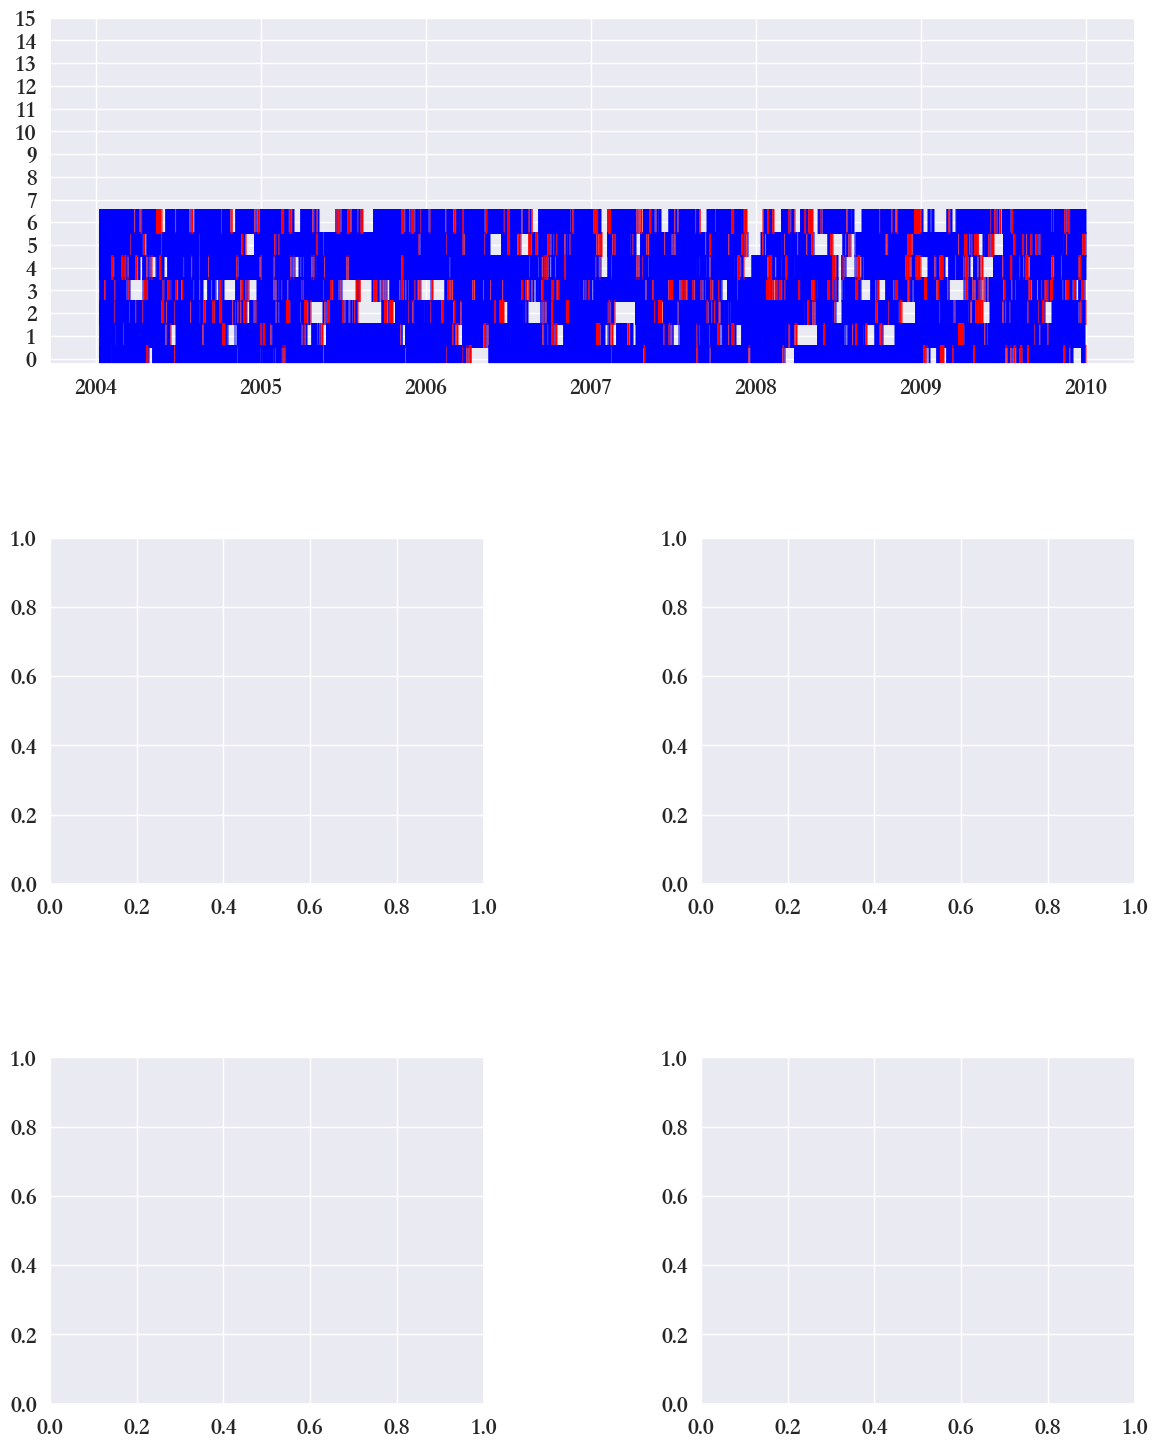

In [4]:
pf.create_round_trip_tear_sheet(returns, positions, transactions, sector_mappings=sect_map)

Under the hood, several functions are being called. `extract_round_trips()` does the portfolio reconstruction and creates the round-trip trades.

In [6]:
rts = pf.round_trips.extract_round_trips(transactions, 
                                         portfolio_value=positions.sum(axis='columns') / (returns + 1))

In [ ]:
rts.head()

In [ ]:
pf.round_trips.print_round_trip_stats(rts)